In [1]:
import sys
import numpy as np
import pylab as pl
import pandas as pd
from matplotlib import colors
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Settings for matplotlib
plt.rcParams["font.family"] = "Arial"
mpl.rcParams['axes.linewidth'] = 2
plt.rcParams.update({'font.size': 20})

In [4]:
df = pd.read_table("data/wtTAR_RMSD_BoundState.cpptrajout", delim_whitespace=True)
df2 = pd.read_csv("data/index_map.csv")
df["sas_idx"] = df2.sas_index
GS_mask = df["sas_idx"] < 5000
ES_mask = df["sas_idx"] >= 5000
print(np.mean(df.loc[GS_mask].all_heavy_atom))
print(np.mean(df.loc[ES_mask].all_heavy_atom))

4.547251080432173
5.332911676646707


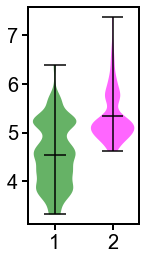

In [6]:
fig, ax = plt.subplots(1,figsize=(2,4))
vp = ax.violinplot([df.loc[GS_mask].all_heavy_atom, df.loc[ES_mask].all_heavy_atom], positions = [1, 2], widths=0.75,
              showmeans=True)
colors = ['green', 'magenta']
counter = 0

vp['cmeans'].set_color('black')
vp['cmins'].set_color('black')
vp['cmaxes'].set_color('black')
vp['cbars'].set_color('black')

plt.tick_params(width=2,length=6)

for pc in vp['bodies']:
    pc.set_facecolor(colors[counter])
    pc.set_alpha(0.6)
    counter += 1
#plt.savefig("plots/Heavy_Atom_RMSD_Violin.pdf")
plt.show()